<a href="https://colab.research.google.com/github/kevinajordan/DS-Training/blob/master/Intro_Neural_Networks_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks
![alt text](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41377-019-0151-0/MediaObjects/41377_2019_151_Fig2_HTML.png?as=webp)

*Note: This section borrows heavily from Dr. Roysdons "A Pracitioners Guide to Neural Networks".*

### Nodes
Analogous to biological neurons, ANN’s have a similar structure with
the output of one neuron connected to the input of another neuron. We
represent these networks as connected layers of nodes, where each node
has many “weighted” inputs from previous nodes[2]. The output of each node is the result of an activation function applied to each input, followed by the sum of the activation function’s, multiplied by the weight of that node.

mathematically, this looks like:

$x_1 w_1 + x_2 w_2 + x_3 w_3 + b $

* w is the weights
* b is the bias
* x is the inputs

### Activation functions
If the input is above a user defined threshold, the activation function switches state, e.g. from 0 to 1, -1 to 1, or from 0 to > 0. A common activation function is the sigmoid function.

### Bias 
By adding a bias term, you can make the node simulate a
generic *if* function, i.e. if (x > z) then 1 else 0. Without a bias term,
you are unable to vary z, and the function will be always near 0. This is
simple example demonstrates the need for a bias to simulate conditional
relationships.

## Structure of a Neural Network

An artifical neural network consists of:
* an input layer
* a hidden layer(s)
* and an output layer - this produces the result of a neural network; the prediction.


## Feed Forward Process

Succintly, feedforward artificial neural networks are networks where the ouput from one node feeds into a node in the next layer and so on, until the ouput layer produces the result. The ouput is not fed back into the model to update the weights.

This is the most basic neural network. Each input shown to a feedforward neural network is processed independently, with no state kept between inputs. With these networks, in order to process a sequence or a temporal series of data points, you have to show the entire sequence to the network at once: turn it into a single data point. For instance, with the IMDB movie review dataset, an entire movie review is transformed into a single large vector and processed in one go.

We will demonstrate this in python later.

## Gradient Descent

Find which weights and bias's minimize a cost function.

![alt text](https://saugatbhattarai.com.np/wp-content/uploads/2018/06/gradient-descent-1.jpg)


## Problem: Classify Handwritten Digits

Classify grayscale images of handwritten digits (28 x 28 pixels) into their 10 categories (0 through 9). Solving MNIST is like the "Hello World" of deep learning.

![alt text](https://3.bp.blogspot.com/-mDyzBzA4btg/V4_Z0f2mc7I/AAAAAAAAE3M/dtU8hT661fQWtnRC_JvIH_4qifQomZ4PACLcB/s1600/MNIST_neuralnet_image.png)

### Dataset: MNIST
Set of 60,000 training images and 10,000 test images. Assembled by NIST in the 1980's.

#### Sources used for this training:

1. Deep Learning with Python by Francois Chollet
2. A Practioners Guide to Neural Networks by P. F. Roysdon, PhD

In [0]:
# Load MNIST
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
len(train_labels)

60000

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

In [0]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Initial Network Architecture

The core building block of neural networks is the *layer*, a data-processing module that you can think of as a filter for data. Some data goes in, and it comes out in a more useful form. 

Specifically, layers extract *representations* out of the data fed into them - hopefully, representations that are more meaningful for the problem at hand.

A deep learning model is like a sieve for data processing, made of a succession of increasingly refined data filters - the layers.

In [0]:
# The network architecture
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

W0813 21:15:13.182682 140217238472576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 21:15:13.254055 140217238472576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 21:15:13.263946 140217238472576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Here, our network consists of a sequence of two Dense layers, which are densely connected (aka *fully connected*) neural layers. 

The second (and last) layer is a 10-way softmax layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 classes.

We need to pick 3 more things to make our network ready to train:
* A *loss* function
* An *optimizer* - the mechanism through which the network will update itself based on the data it sees and its loss function.
* *Evaluation Metrics* - here, we'll only care about accuracy. As a rule of thumb, it's always best to pick one metric to optimize.

In [0]:
# Compilation step
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

W0813 21:15:19.865456 140217238472576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0813 21:15:19.906214 140217238472576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



Before training, we'll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval.

Previously, our training images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28* 28) with values between 0 and 1.

In [0]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape(10000, 28 * 28)
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels

In [0]:
# Preparing the labels
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network. This is done by the same method we have seen with scikit-learn: *fit*. We *fit* the model to it's training data.

In [0]:
network.fit(train_images, train_labels, epochs = 5, batch_size=128)

W0813 21:33:21.088517 140217238472576 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0813 21:33:21.161081 140217238472576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.2576 - acc: 0.9256
Epoch 2/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.1038 - acc: 0.9695
Epoch 3/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.0687 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0498 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0374 - acc: 0.9891


Two quantities are displayed during the training: the loss of the network over the training data, and the accuracy of the network over the training data.

Quickly, we reached an accuracy of 98.9% on the training data.

In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print ('test accuracy:', test_acc)

10000/10000 [==============================] - 1s 52us/step
test accuracy: 0.9792


This gap between the training accuracy and test accuracy is an example of *overfitting*. The fact that machine-learning methods tend to perform worse on new data than on their training data.

## Data Representations for Neural Networks

In general, all current machine-learning systems use tensors as their basic data structure. They are fundamental to the field of machine learning and deep learning. 

Tensors are a generalization of matrices to an arbitrary number of dimensions (remember a *dimension* is often called an *axis*).

### Scalars (0D Tensors)

A tensor that only contains one number is called a *scalar*. In Numpy, a float32 or float64 number is a scalar tensor.

The number of axes of a tensor is also called its rank.

You can display the number of axes of a Numpy tensor via the ndim attribute. 

In [0]:
import numpy as np
x = np.array(12)
x

array(12)

In [0]:
x.ndim

0

### Vectors (1D tensors)
An array of numbers is called a vector, or 1D tensor. A vector has exactly 1 axis.

In [0]:
x = np.array([12, 3, 6, 14])
x

array([12,  3,  6, 14])

In [0]:
x.ndim

1

This vector has 5 entries and so is called a *5-dimensional* vector.

A 5D vector has only 5 dimensions along it's axis, where a 5D tensor has five axes.

Dimensionality can denote either the number of entries along a specific axis (as in the case of our 5D vector) or the number of axes in a tensor (such as a 5D tensor). This can be confusing. For tensors, its technically more correct to talk about a *tensor of rank 5*.

### Matrices (2D tensors)
An array of vectors is a matrix, or 2D tensor. A matrix has two axes (referred to as *rows* and *columns*)

In [0]:
x = np.array([[5, 78, 2, 34, 0], [6, 79, 3, 35, 1], [7, 80, 4, 36, 2]])
x.ndim

2

### 3D tensors and higher-dimensional tensors
if you pack such matrices in a new array, you obtain a 3D tensor, which visually you can think of as a cube of numbers.

In [0]:
x = np.array([[[5, 78, 2, 34, 0], [6, 79, 3, 35, 1], [7, 80, 4, 36, 2],
              [5, 78, 2, 34, 0], [6, 79, 3, 35, 1], [7, 80, 4, 36, 2],
              [5, 78, 2, 34, 0], [6, 79, 3, 35, 1], [7, 80, 4, 36, 2]]])
x.ndim

3

In deep learning, you'll generally manipulate tensors that are 0D to 4D, although you may go up to 5D if you process video data.

### Key Attributes of Tensors

* Number of axes (rank)
* Shape - A tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the 3D tensor example has shape (3, 3, 5).
* Data Type ( *dtype* in python libraries) - type of data contained in a tensor; for instance, a tensor's type could be float32, uint8, float64, and so on. Note: string tensors don't exist in Numpy (or most other libraries). 

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step
3


In [3]:
print(train_images.ndim)

3


In [4]:
print(train_images.shape)

(60000, 28, 28)


In [5]:
print(train_images.dtype)

uint8


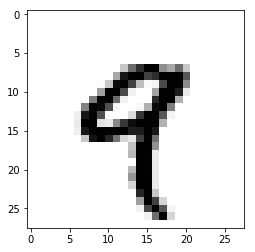

In [6]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


### Manipulating Tensors in Numpy

In [7]:
# tensor slicing
my_slice = train_images[10:100] # selects digits 10 to 99 (100 is not included)
print(my_slice.shape)

(90, 28, 28)


In [8]:
# more detailed for each axis of a tensor
my_slice = train_images[10:100, :, :] # equivalent to previous example
my_slice.shape

(90, 28, 28)

In [10]:
my_slice = train_images[10:100, 0:28, 0:28] # also equivalent to previous example
my_slice.shape

(90, 28, 28)

In [0]:
my_slice = train_images[:. 14:, 14:] # selects 14 x 14 pixels in the bottom right corner of all images
my_slice = train_images[:, 7:-7, 7:-7] # select 14x14 pixes in the middle of all images

In general, the first axis in all data tensors you'll come across in deep learning will be the *sample* axis (sometimes called the *samples* dimension). For our example, samples are images of digits.

### Notion of Data Batches
Deep learning models don't process an entire dataset at once; rather, they break data into small batches. 

In [0]:
batch = train_images[:128] # first batch
next_batch = train_images[128:256] # second batch


### Real-World Examples of Data Tensors
* *Vector data* - 2D tensors of shape (samples, features)
* *Timeseries data or sequence data* - 3D tensors of shape (samples, timesteps, features)
* *Images*  - 4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)
* *Video* - 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

## Tensor Operations - The Gears of Neural Networks

All transformations learned by neural networks can be reduced to a handful of tensor operations applied to tensors of numeric data. Let's return to our neural network we built above. 

We were building our network by stacking Dense layers on top of each other. A single Keras layer looks like this:


```
keras.layers.Dense(512, activation='relu')
```
This layer can be interpreted as a function, which takes as input a 2D tensor and returns another 2D tensor - a new representation for the input tensor. Specifically, the function is as follows (where W is a 2D tensor and b is a vector, both attributes of the layer):
```
output = relu(dot(W, input) + b)
```

Let's unpack this. We have three tensor operations here:
* a dot product (dot) between the input tensor and a tensor named W
* an addition (+) between the resulting 2D tensor and a vector b 
* a relu operation. relu(x) is max(x, 0).

All of these operations deal with Linear Algebra expressions. Instead of covering the mathematical notation, we will cover these operations with short python snippets so they are easier to understand for those who have no mathematical background.



### Element-Wise Operations

The relu operation and addition are *element-wise* operations: operations that are applied independently to each entry in the tensors being considered. This means these operations are highly amenable to massively parallel implementations.

If you want to write a naive Python implementation of an element-wise operation, you use a *for* loop.

In [0]:
# naive implementation of an element-wise relu operation
def naive_relu(x):
  assert len(x.shape) == 2 # x is a 2D Numpy tensor.
  x = x.copy() # avoid overwriting the input tensor
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

In [0]:
# naive addition
def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape

  x = x.copy() # avoid overwriting the input tensor
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

The same functions defined above, implemented in Numpy very efficiently.

In [0]:
import numpy as np
z = x + y # element wise addition
z = np.maximum(z, 0.) # element wise relu

### Broadcasting

What happens with addition when the shapes of two tensors being added, differ?

When possible, the smaller tensor will be broadcasted to match the shape of the larger tensor. Broadcasting consists of two steps:
1. Axes are added to the smaller tensor to match the ndim of the larger tensor.
2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

Consider X with shape (32, 10) and y with shape (10, ). First, we add an empty first axis to y, whose shape becomes (1, 10). Then, we repeat y 32 times alongside this new axis, so that we end up with a tensor Y with shape (32, 10), where Y[i, :] == y for i in range(0, 32). At this point we can proceed to add X and Y, because they have the same shape.

Let's look at the following implementation of broadcasting in Python.

In [0]:
# example applies the element wise maximum operation to two tensors of different shapes via broadcasting
import numpy as np
x = np.random.random((64, 3, 32, 10)) # random tensor with shape (64, 3, 32, 10)
y = np.random.random((32, 10)) # random tensor with shape (32, 10)

z = np.maximum(x, y) # output z has shape (64, 3, 32, 10) like x.

### Tensor Dot

The dot operation, also called a *tensor product* (not element-wise product), is the most common, most useful tensor operation. Contrary to element-wise operations, it combines entries in the input tensors.

An element-wise product is done with the * operator in Numpy, Keras, Theano, and TensorFlow. *dot* uses a different syntax in TensorFlow, but in both Numpy and Keras it's done using the standard *dot* operator.

```
import numpy as np
z = np.dot(x, y)
```
The dot product between two vectors is a scalar and that only vectors with the same number of elements are compatible for a dot product. 

You can take the dot product of two matrices x and y (dot(x, y)) if and only if x.shape[1] == y.shape[0]. The result is a matrix with shape (x.shape[0], y.shape[1]), where the coefficients are the vector products between the rows of x and the columns of y.

In [0]:
def naive_matrix_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] = y.shape[0] # the first dimension of x must be the same as the 0th dimension of y

  z = np.zeros((x.shape[0],. y.shape[1]))
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i, :]
      column_y = y[:, j]
      z[i, j] = naive_vector_dot(row_x, column_y)
  return z

## Tensor reshaping

A third type of tensor operation that's essential to understand is tensor reshaping. We used it previously when we preprocessed the digits data before feeding it into our network:
```
train_images = train_images.reshape((60000, 28 * 28))
```

Reshaping a tensor means rearranging its rows and columns to match a target shape. Naturally, the reshaped tensor has the same total number of coefficients as the initial tensor. 

Below are some simple examples:


In [12]:
x = np.array([[0., 1.], [2., 3.], [4., 5.]])
print(x.shape)

(3, 2)


In [13]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [14]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

A common case of reshaping is *transposition*. Transposing a matrix means exchanging its rows and its columns, so that x[i, :] becomes x[:, i]

In [15]:
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)


## Back Propagation
Starts with the final loss value and and works backward from the output layers to the input layer, applying the chain rule to compute the contribution that each parameter had in the loss value. It then updates the weights and biases to minimize the loss.

This is already implemented for you, but it is good to know about.

We will cover this more in depth in the next lesson.

Helpful Video for Understanding backprop
https://www.youtube.com/watch?v=Ilg3gGewQ5U
